# 几个问题
## 1. 采集的数据是否已经经过了处理（我认为数据已经经过了处理，而且传感器应该没有这么多，应该是经过了计算，比如转速、功率等），还是有536个传感器？
## 2. 柴油机在平时操作是除了加减转还有其他什么操作？
## 3. 就是能够判断故障，也无法在实际中检验（不可能把实际使用的柴油机弄坏，而且故障多种多样）
## 4. 采样频率是多少？

# 观察数据情况

In [1]:
import pandas as pd
import numpy as np
import glob
filenames =  glob.glob('dataset/*.csv')   # 数据文件名
data0 = pd.read_csv (filenames[0])
print("数据大小为：%d 行，%d 列" % (data0.shape[0],data0.shape[1]))
temp = data0.dropna().shape
print("去除缺失值后大小为：%d 行，%d 列" % (temp[0],temp[1]))  # 检查是否存在缺失值
data0.describe()   # 可以看出很多数据没有值

数据大小为：22151 行，536 列
去除缺失值后大小为：22151 行，536 列


,ambient pressure / 大气压力 kPa,T/C compressor Inlet Pre （Ambient Pre ）/ 压气机进口压力（大气压力） mbar,T/C compressor Inlet temp / 压气机进口温度 ℃,Engine speed / 发动机转速 1/min,Engine load / 发动机功率 kW,T/C compressor Outlet Pre / 压气机出口压力 bar,T/C compressor Outlet Temp / 压气机出口温度（空冷器进口温度）℃,Manifold Pressure / 进气总管压力（增压压力） kPa,NO.9,Manifold Temp / 进气总管温度 ℃,...,未命名 526,未命名 527,未命名 528,未命名 529,未命名 530,未命名 531,未命名 532,未命名 533,未命名 534,未命名 535
count,22151.0,22151.000000,22151.0,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.0,22151.000000,...,22151.0,22151.0,22151.0,22151.0,22151.0,22151.0,22151.0,22151.0,22151.0,22151.0
mean,0.0,-0.173333,0.0,327.887098,778.667446,1.109667,124.942906,104.611250,0.0,46.131348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.032335,0.0,322.690969,831.910037,1.230597,55.050543,124.765004,0.0,2.371079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,-0.290285,0.0,0.000000,0.000000,-0.020586,31.300000,0.000000,0.0,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,-0.196718,0.0,0.000000,0.000000,0.004342,73.600000,0.000000,0.0,44.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,-0.159346,0.0,473.500000,605.900000,0.473764,118.400000,39.600000,0.0,47.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,-0.151034,0.0,598.000000,1221.100000,1.660529,158.300000,163.300000,0.0,47.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,-0.111104,0.0,772.000000,2514.100000,3.992813,242.500000,393.500000,0.0,49.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 去除无效数据

In [2]:
# 为保险起见，先分析最小值等于最大值的情况，再在该情况中分析均值为0的情况
# 其实和直接分析均值为0一样
# 通过分析发现存在最大值等于最小值且均值不为零的情况，且该种情况数据理论上无效，所以也去除
drop_columns = []
for column in data0.columns:
    if data0.loc[:,column].min() == data0.loc[:,column].max():
    # and data0.loc[:,column].mean()== 0:
    # 加上上述注释语句时输出为：去除无效数据后大小为：22151 行，315 列
        drop_columns.append(column) 
data_new = data0.drop(drop_columns,axis=1)
print("去除无效数据后大小为：%d 行，%d 列" % (data_new.shape[0],data_new.shape[1]))
data_new.describe()

去除无效数据后大小为：22151 行，245 列


,T/C compressor Inlet Pre （Ambient Pre ）/ 压气机进口压力（大气压力） mbar,Engine speed / 发动机转速 1/min,Engine load / 发动机功率 kW,T/C compressor Outlet Pre / 压气机出口压力 bar,T/C compressor Outlet Temp / 压气机出口温度（空冷器进口温度）℃,Manifold Pressure / 进气总管压力（增压压力） kPa,Manifold Temp / 进气总管温度 ℃,A1 Cylinder Intake Air Temp / 第一缸进气温度 ℃,A6 Cylinder Intake Air Temp / 第六缸进气温度 ℃,T/C Turbine Inlet Pre / 涡前排气总管压力 bar,...,未命名 505,未命名 506,未命名 507,未命名 508,未命名 509,未命名 510,未命名 516,未命名 517,未命名 518,未命名 519
count,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,...,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000,22151.000000
mean,-0.173333,327.887098,778.667446,1.109667,124.942906,104.611250,46.131348,44.658273,21.285834,0.696360,...,0.107463,0.118953,0.125123,0.116277,0.116559,0.120270,1.872602,5.147076,0.309464,2.342190
std,0.032335,322.690969,831.910037,1.230597,55.050543,124.765004,2.371079,4.885828,3.122397,0.696003,...,0.352314,0.368627,0.381918,0.376355,0.363677,0.366821,3.901290,4.985301,0.320909,0.009475
min,-0.290285,0.000000,0.000000,-0.020586,31.300000,0.000000,30.000000,27.600000,11.500000,0.087854,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,2.300000
25%,-0.196718,0.000000,0.000000,0.004342,73.600000,0.000000,44.600000,41.300000,20.800000,0.089769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,2.340000
50%,-0.159346,473.500000,605.900000,0.473764,118.400000,39.600000,47.400000,44.000000,22.700000,0.356920,...,0.080000,0.090000,0.080000,0.080000,0.090000,0.090000,0.000000,9.700000,0.320000,2.340000
75%,-0.151034,598.000000,1221.100000,1.660529,158.300000,163.300000,47.400000,47.600000,23.200000,0.989098,...,0.130000,0.150000,0.140000,0.140000,0.140000,0.130000,0.000000,10.000000,0.640000,2.350000
max,-0.111104,772.000000,2514.100000,3.992813,242.500000,393.500000,49.800000,54.700000,24.000000,2.441815,...,5.500000,6.200000,7.120000,6.980000,5.270000,6.830000,10.000000,10.530000,0.820000,2.390000


# 数据标准化
由于数据各值大小不一，采用Z-score标准化方法，即
$\hat{x}=\frac{x-\mu}{\sigma}$
未采用min-max标准化（Min-Max Normalization）方法

In [3]:
data_norm = (data_new-data_new.mean())/data_new.std()

# 查看各列之间的相关性

In [4]:
import seaborn as sns
data_corr = data_norm.corr()  # 协方差  pearson相关系数 数据较大不好分析
sns.heatmap(data_corr,xticklabels= False, yticklabels= False)

In [5]:
print("剔除完无用值总的特征共有%d个" %data_corr.shape[0])
threshold = 0.95
speed_corr = data_corr.iloc[:,1].abs()[data_corr.iloc[:,1].abs()>threshold]
print("其中与转速相关性大于%.2f的特征共有%d个"%(threshold,speed_corr.shape[0]))
load_corr = data_corr.iloc[:,2].abs()[data_corr.iloc[:,2].abs()>threshold]
print("其中与功率相关性大于%.2f的特征共有%d个"%(threshold,speed_corr.shape[0]))

剔除完无用值总的特征共有245个
其中与转速相关性大于0.95的特征共有95个
其中与功率相关性大于0.95的特征共有95个


转速和功率高度相关从与其他特征相关性可以看出，上述调整阈值情况下转速功率变化相同，
阈值为0.5时，剩余特征174个，占比71.0%;
阈值为0.75时，剩余特征133个，占比54.3%;
阈值为0.85时，剩余特征129个，占比52.7%;
阈值为0.95时，剩余特征95个，占比38.8%.
以上数据说明个传感器采集数据之间高度相关，数据冗余。

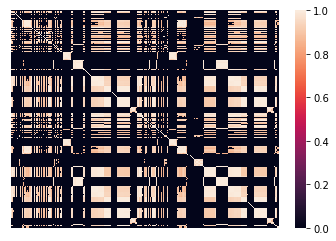

In [6]:
data_corr2 = data_corr[data_corr.abs()>0.85].abs()
data_corr2.fillna(0.0,inplace=True)
sns.heatmap(data_corr2,xticklabels= False, yticklabels= False)

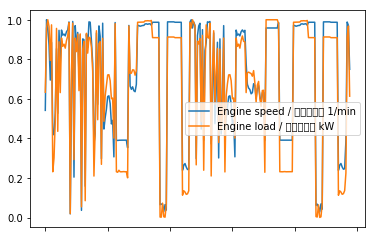

In [7]:
data_corr.abs().iloc[:,1:3].plot()   # 发动机转速、功率与其他数据间的相关性

可以看出大部分数据之间相关性较高，可以通过降维来减少数据冗余

# 分析一下个别数据

Text(0.5, 1.0, '发动机转速功率对比')

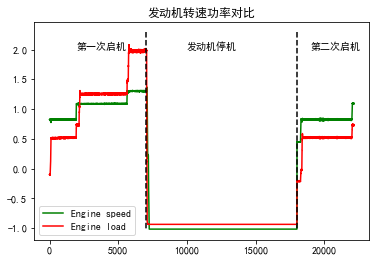

In [51]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  #指定默认字体  
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
plt.plot(data_norm.iloc[:,1],color='g',label='Engine speed')
plt.plot(data_norm.iloc[:,2],color='r',label='Engine load')
plt.plot([7030,7030],[max(data_norm.iloc[:,2])*1.1,min(data_norm.iloc[:,2])*1.1],'--k')
plt.plot([18000,18000],[max(data_norm.iloc[:,2])*1.1,min(data_norm.iloc[:,2])*1.1],'--k')
plt.annotate('第一次启机',xy=(2200,2),xytext=(2000,2))
plt.annotate('发动机停机',xy=(12000,2),xytext=(10000,2))
plt.annotate('第二次启机',xy=(20000,2),xytext=(19000,2))
plt.legend(loc='best')
plt.title("发动机转速功率对比")

Text(0.5, 1.0, '发动机转速、功率（原始数据）')

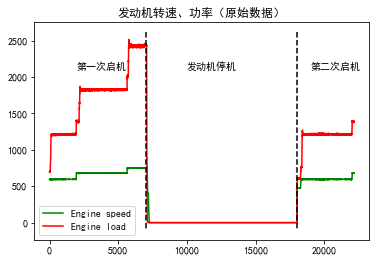

In [45]:
plt.plot(data0.iloc[:,3],color='g',label='Engine speed')
plt.plot(data0.iloc[:,4],color='r',label='Engine load')
plt.plot([7030,7030],[max(data0.iloc[:,4])+100,-100],'--k')
plt.plot([18000,18000],[max(data0.iloc[:,4])+100,-100],'--k')
plt.annotate('第一次启机',xy=(2200,1900),xytext=(2000,2100))
plt.annotate('发动机停机',xy=(12000,1900),xytext=(10000,2100))
plt.annotate('第二次启机',xy=(20000,1900),xytext=(19000,2100))
plt.legend(loc='best')
plt.title("发动机转速、功率（原始数据）")

In [13]:
data0.head()

,ambient pressure / 大气压力 kPa,T/C compressor Inlet Pre （Ambient Pre ）/ 压气机进口压力（大气压力） mbar,T/C compressor Inlet temp / 压气机进口温度 ℃,Engine speed / 发动机转速 1/min,Engine load / 发动机功率 kW,T/C compressor Outlet Pre / 压气机出口压力 bar,T/C compressor Outlet Temp / 压气机出口温度（空冷器进口温度）℃,Manifold Pressure / 进气总管压力（增压压力） kPa,NO.9,Manifold Temp / 进气总管温度 ℃,...,未命名 526,未命名 527,未命名 528,未命名 529,未命名 530,未命名 531,未命名 532,未命名 533,未命名 534,未命名 535
0,0,-0.228255,0,594.9,699.2,0.789410,56.5,75.3,0,30.0,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.237153,0,595.1,700.8,0.785485,56.6,76.4,0,30.0,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.225842,0,594.7,690.9,0.807606,57.2,78.5,0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.226071,0,594.7,690.9,0.803469,57.2,78.5,0,30.0,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.230667,0,593.9,692.9,0.802300,57.4,78.9,0,30.0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
columns = list(data_norm.columns)
for i in range(50):
    print(columns[i])

T/C compressor Inlet Pre （Ambient Pre ）/ 压气机进口压力（大气压力） mbar
Engine speed / 发动机转速 1/min
Engine load / 发动机功率 kW
T/C compressor Outlet Pre / 压气机出口压力 bar
T/C compressor Outlet Temp / 压气机出口温度（空冷器进口温度）℃
Manifold Pressure / 进气总管压力（增压压力） kPa
Manifold Temp / 进气总管温度 ℃
A1 Cylinder Intake Air Temp / 第一缸进气温度 ℃
A6 Cylinder Intake Air Temp / 第六缸进气温度 ℃
T/C Turbine Inlet Pre / 涡前排气总管压力 bar
T/C Turbine Outlet Pre / 涡后排气总管压力 mbar
T/C Turbine Inlet Temp / 涡前温度 ℃
 T/C Turbine Outlet Temp / 涡后温度 ℃
A1 Cylinder Exhaust Temp / 各缸排温 ℃
A2 Cylinder Exhaust Temp / 各缸排温 ℃
A3 Cylinder Exhaust Temp / 各缸排温 ℃
A4 Cylinder Exhaust Temp / 各缸排温 ℃
A5 Cylinder Exhaust Temp / 各缸排温 ℃
A6 Cylinder Exhaust Temp / 各缸排温 ℃
Turbo charger speed / 增压器转速 rpm
Blow-by / 活塞漏气量 dm3/min
Crankcase pressure / 曲轴箱压力 kPa
HT Water Pressure Engine Inlet / 高温水进机压力 kPa
HT Water Temp Engine Outlet / 冷却水出机温度 ℃
HT Water Temp Intercooler Outlet / 中冷器出口高温水温 ℃
HT Water Flow Rate / 高温水流量 m3/h
HT Thermostatic valve Inlet Pre / 高温调温阀进口水压 kPa
HT water pump ou

In [61]:
print(columns[35])

LO Pressure Engine Inlet / 滑油进机压力 kPa


Text(0.5, 1.0, 'Engine speed / 发动机转速 1/min\nLO Pressure Engine Inlet / 滑油进机压力 kPa')

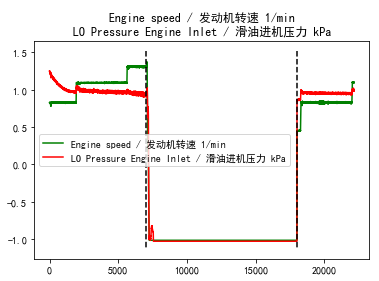

In [62]:
I,J = 1,35   # 要选择对比的数据
maxvalue = max(max(data_norm.iloc[:,I]),max(data_norm.iloc[:,J]))*1.1
minvalue = min(min(data_norm.iloc[:,I]),min(data_norm.iloc[:,J]))
minvalue = minvalue*1.1 if minvalue<0 else minvalue*0.9
plt.plot(data_norm.iloc[:,I],color='g',label=columns[I])
plt.plot(data_norm.iloc[:,J],color='r',label=columns[J])
plt.plot([7030,7030],[maxvalue,minvalue],'--k')
plt.plot([18000,18000],[maxvalue,minvalue],'--k')
plt.annotate('第一次启机',xy=(2200,2),xytext=(2000,2))
plt.annotate('发动机停机',xy=(12000,2),xytext=(10000,2))
plt.annotate('第二次启机',xy=(20000,2),xytext=(19000,2))
plt.legend(loc='best')
plt.title(columns[I]+'\n'+columns[J])

# 数据降维

In [15]:
DIMENSION = 2   # 定义目标维度
colors = ['b','k','m','g','r','y',\
          'lightpink','peru','mediumslateblue','orange']

Text(0.5, 1.0, '第二次启机')

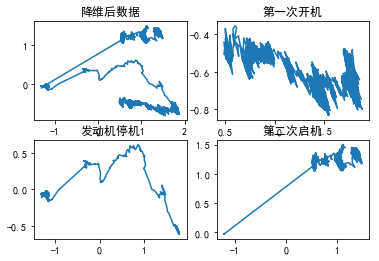

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=DIMENSION)   # 使用PCA将数据降至10维
data_2_XD = pca.fit_transform(data_norm)
# 降维后数据再次标准化一下
data_2_XD = (data_2_XD-data_2_XD.mean())/data_2_XD.std()
#for i in range(data_2_XD.shape[1]):
    #plt.plot(data_2_XD[:,i],color=colors[i])
plt.figure
plt.subplot(221)
plt.plot(data_2_XD[:,0],data_2_XD[:,1])
plt.title("降维后数据")
plt.subplot(222)
plt.plot(data_2_XD[:7030,0],data_2_XD[:7030,1])  # 7030之后发动机停机
plt.title("第一次启机")
plt.subplot(223)
plt.plot(data_2_XD[7030:18000,0],data_2_XD[7030:18000,1])
plt.title("发动机停机")
plt.subplot(224)
plt.plot(data_2_XD[18000:,0],data_2_XD[18000:,1])
plt.title("第二次启机")

Text(0.5, 1.0, '降维后数据')

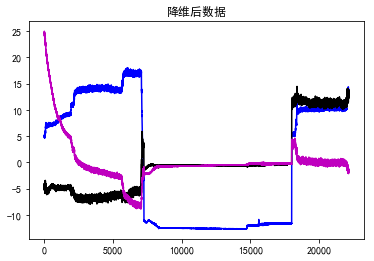

In [12]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=DIMENSION,kernel='rbf',gamma=0.04)
data_2_XD_rbf = pca.fit_transform(data_norm)
for i in range(data_2_XD_rbf.shape[1]):
    plt.plot(data_2_XD_rbf[:,i],color=colors[i])
plt.title("降维后数据")